In [1]:

import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

import numpy as np
import pandas as pd
data = pd.read_csv("/home/ui556004/projects/musicbert_hf/scripts/wandb_logs/nas_params.csv")
len(data)

42

In [2]:
data.columns.values

array(['Name', 'State', 'Created', 'Group', 'seed',
       'eval/inversion_accuracy', 'train/learning_rate',
       'eval/key_pc_mode_accuracy', 'eval/quality_accuracy',
       'eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy',
       'freeze_layers', 'batch_size', 'train/global_step',
       'learning_rate', 'quality.num_linear_layers',
       'primary_alteration_primary_degree_secondary_alteration_secondary_degree.num_linear_layers',
       'key_pc_mode.num_linear_layers', 'inversion.num_linear_layers',
       'End Time', 'Notes', 'eval/accuracy',
       'hyperparams.inversion.linear_layers_dim', 'quality.activation_fn',
       'inversion.activation_fn',
       'primary_alteration_primary_degree_secondary_alteration_secondary_degree.activation_fn',
       'key_pc_mode.activation_fn',
       'hyperparams.key_pc_mode.activation_fn',
       'hyperparams.inversion.activation_fn',
       'hyperparams.inversion.normalisation',
       'hyperparams.inver

In [3]:
from ast import literal_eval
columns = [column   for column in data.columns.values if not (column.endswith("__MIN") or column.endswith("__MAX") or column.startswith("Created") or column.startswith("End")  ) ]
data_filtered = data[columns]
activation_fn_columns = [column for column in data_filtered.columns if column.endswith("activation_fn")]
for column in activation_fn_columns:
    data_filtered[column] = data_filtered[column] .apply(literal_eval)
data_filtered.head()

/tmp/ui556004/login23-1_1247272/ipykernel_360689/3584048438.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[column] = data_filtered[column] .apply(literal_eval)


,Name,State,Group,seed,eval/inversion_accuracy,train/learning_rate,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,freeze_layers,...,key_pc_mode.activation_fn,hyperparams.key_pc_mode.activation_fn,hyperparams.inversion.activation_fn,hyperparams.inversion.normalisation,hyperparams.inversion.pooler_dropout,hyperparams.freeze_layers,test/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,test/quality_accuracy,test/key_pc_mode_accuracy,test/inversion_accuracy
0,trial_44,finished,attemtping_nas_1,42,0.865300,6.849192e-05,0.836752,0.864800,0.755756,7,...,[gelu],[gelu],"[gelu, relu, relu, relu]","[""none"",""layer"",""none"",""none""]","[0.19544505144816648,0.26133404278764066,0.091...",7,NaN,NaN,NaN,NaN
1,trial_43,finished,attemtping_nas_1,42,0.841733,9.686664e-06,0.823776,0.854000,0.725928,6,...,"[tanh, relu, tanh, tanh, gelu, tanh]","[tanh, relu, tanh, tanh, gelu, tanh]","[tanh, relu, tanh]","[""layer"",""layer"",""layer""]","[0.30122170059628384,0.16593749714916284,0.142...",6,NaN,NaN,NaN,NaN
2,trial_42,finished,attemtping_nas_1,42,0.854162,5.810316e-04,0.812904,0.853325,0.736189,7,...,"[relu, tanh, tanh, tanh, tanh, relu]","[relu, tanh, tanh, tanh, tanh, relu]",[tanh],"[""layer""]",[0.361807250255753],7,NaN,NaN,NaN,NaN
3,trial_41,finished,attemtping_nas_1,42,0.865199,1.121298e-04,0.832602,0.859161,0.738678,7,...,"[gelu, tanh, tanh, tanh, relu, relu]","[gelu, tanh, tanh, tanh, relu, relu]","[tanh, relu, tanh]","[""layer"",""layer"",""none""]","[0.2325902441826025,0.010138123439974334,0.200...",7,NaN,NaN,NaN,NaN
4,trial_40,finished,attemtping_nas_1,42,0.866415,1.895691e-07,0.837870,0.860987,0.752601,7,...,"[gelu, tanh, tanh, tanh, relu, relu]","[gelu, tanh, tanh, tanh, relu, relu]","[tanh, relu, tanh]","[""layer"",""layer"",""none""]","[0.22320394798737436,0.0006996362698388214,0.0...",7,NaN,NaN,NaN,NaN


In [12]:
inversion_columns = [column for column in data_filtered.columns.values if "inversion"  in column]
df_inversion = data_filtered[inversion_columns]
df_inversion

,eval/inversion_accuracy,hyperparams.inversion.num_linear_layers,hyperparams.inversion.activation_fn,hyperparams.inversion.linear_layers_dim,hyperparams.inversion.pooler_dropout,hyperparams.inversion.normalisation
0,0.853158,3,"[""relu"",""tanh"",""gelu""]","[111,648,146]","[0.0500994107276998,0.042085050503210486,0.025...","[""none"",""none"",""none""]"
1,0.853893,3,"[""tanh"",""relu"",""relu""]","[88,219,391]","[0.17912360736888994,0.18323653734748577,0.291...","[""none"",""layer"",""layer""]"
2,0.846751,6,"[""gelu"",""tanh"",""relu"",""gelu"",""relu"",""gelu""]","[152,82,361,733,362,227]","[0.18871321750863945,0.1807289798920071,0.4795...","[""layer"",""none"",""layer"",""layer"",""none"",""none""]"
3,0.851765,6,"[""gelu"",""relu"",""gelu"",""tanh"",""tanh"",""tanh""]","[763,46,650,390,765,509]","[0.26690252977910606,0.1521591454039718,0.1778...","[""layer"",""none"",""layer"",""none"",""layer"",""none""]"
4,0.860716,4,"[""relu"",""relu"",""gelu"",""gelu""]","[173,763,521,495]","[0.13257004707141334,0.07851758738538095,0.441...","[""layer"",""none"",""layer"",""none""]"
5,0.855492,1,"[""tanh""]",[334],[0.3240384137779224],"[""layer""]"
6,0.857051,3,"[""tanh"",""tanh"",""tanh""]","[387,83,601]","[0.02416617967235468,0.35347699074164063,0.214...","[""layer"",""layer"",""layer""]"
7,0.861376,5,"[""gelu"",""gelu"",""tanh"",""tanh"",""gelu""]","[108,697,404,641,267]","[0.028779380008322145,0.27476444116186777,0.22...","[""layer"",""none"",""layer"",""layer"",""none""]"
8,0.854586,4,"[""tanh"",""relu"",""relu"",""relu""]","[101,303,227,211]","[0.21409207415865716,0.4833274095218348,0.4818...","[""none"",""layer"",""none"",""none""]"
9,0.845458,6,"[""tanh"",""gelu"",""relu"",""relu"",""tanh"",""gelu""]","[222,520,261,415,434,168]","[0.03727532183988541,0.49344346830025865,0.386...","[""layer"",""none"",""none"",""none"",""none"",""layer""]"


In [93]:
columns_acc =["Name"] + [column for column in data_filtered.columns.values if column.startswith("eval")]
data_eval = data_filtered[columns_acc]
data_eval

,Name,eval/inversion_accuracy,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,eval/accuracy
0,trial_32,0.844762,0.826639,0.847078,0.723962,0.810610
1,trial_31,0.855515,0.834302,0.861019,0.743259,0.823524
2,trial_30,0.861484,0.834556,0.860649,0.738222,0.823728
3,trial_29,0.839208,0.831478,0.857365,0.717749,0.811450
4,trial_28,0.851531,0.817389,0.851595,0.727975,0.812122
5,trial_27,0.869713,0.831433,0.862872,0.745222,0.827310
6,trial_26,0.870157,0.833059,0.864956,0.737704,0.826469
7,trial_25,0.862284,0.837690,0.857398,0.735714,0.823271
8,trial_24,0.868972,0.834920,0.863224,0.748096,0.828803
9,trial_23,0.850753,0.815842,0.841793,0.713709,0.805524


In [94]:
list(data_eval.columns)
baseline = { 
    "Name" : "baseline",
     'eval/inversion_accuracy': 0.872,
            'eval/key_pc_mode_accuracy': 0.822,
            "eval/quality_accuracy": 0.867,
            'eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy': 0.762,

}
baseline["eval/accuracy"] = float(np.mean(list(baseline.values())[1:]))
baseline

{'Name': 'baseline',
 'eval/inversion_accuracy': 0.872,
 'eval/key_pc_mode_accuracy': 0.822,
 'eval/quality_accuracy': 0.867,
 'eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy': 0.762,
 'eval/accuracy': 0.83075}

In [95]:
df_baseline = pd.concat([pd.DataFrame([baseline], columns=data_eval.columns), data_eval], axis=0,  ignore_index=True)
df_baseline.sort_values(by = ["eval/accuracy"], ascending=False)

,Name,eval/inversion_accuracy,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,eval/accuracy
0,baseline,0.872000,0.822000,0.867000,0.762000,0.830750
9,trial_24,0.868972,0.834920,0.863224,0.748096,0.828803
19,trial_13,0.865576,0.834458,0.862876,0.749232,0.828035
6,trial_27,0.869713,0.831433,0.862872,0.745222,0.827310
7,trial_26,0.870157,0.833059,0.864956,0.737704,0.826469
3,trial_30,0.861484,0.834556,0.860649,0.738222,0.823728
2,trial_31,0.855515,0.834302,0.861019,0.743259,0.823524
8,trial_25,0.862284,0.837690,0.857398,0.735714,0.823271
17,trial_15,0.859901,0.828756,0.856347,0.742661,0.821916
25,trial_7,0.860716,0.825901,0.859136,0.739958,0.821428


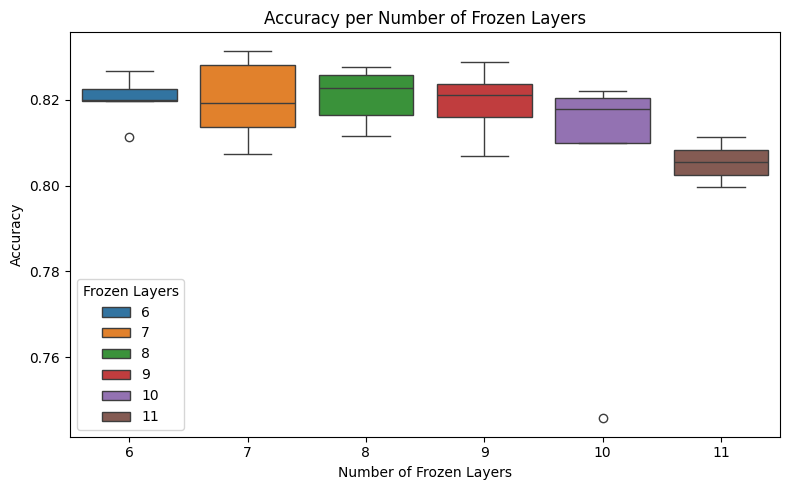

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure freeze_layers is treated as categorical
#data_filtered['freeze_layers'] = data_filtered['freeze_layers']  # or use Categorical if you want specific order

# Create the plot
plt.figure(figsize=(8, 5))
#sns.stripplot(data=data_filtered,  x='freeze_layers', y='eval/accuracy', hue='freeze_layers', palette='tab10', dodge=False)
sns.boxplot(data=data_filtered, x='freeze_layers', y='eval/accuracy', hue='freeze_layers', palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Number of Frozen Layers")
plt.ylabel("Accuracy")
plt.title("Accuracy per Number of Frozen Layers")
plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.show()

/tmp/ui556004/login23-1_1247272/ipykernel_360689/2121625591.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['batch_size'] = data_filtered['batch_size'].astype(str)  # or use Categorical if you want specific order
/tmp/ui556004/login23-1_1247272/ipykernel_360689/2121625591.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Frozen Layers")


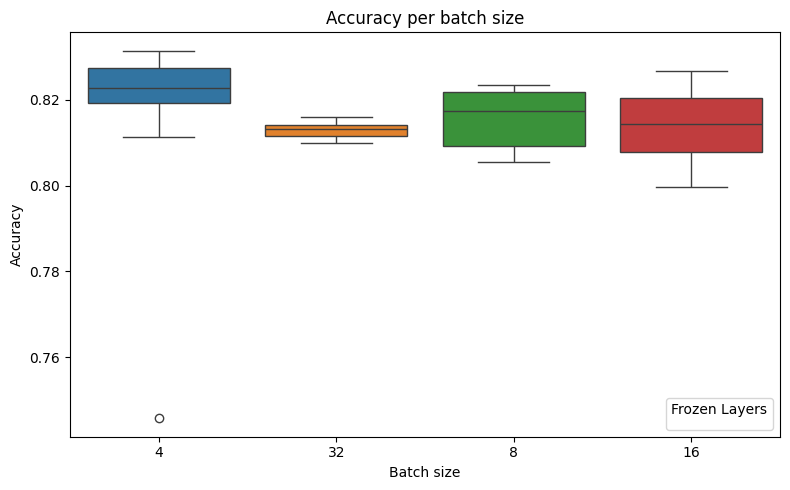

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure freeze_layers is treated as categorical
data_filtered['batch_size'] = data_filtered['batch_size'].astype(str)  # or use Categorical if you want specific order

# Create the plot
plt.figure(figsize=(8, 5))
#sns.stripplot(data=data_filtered, x='batch_size', y='eval/accuracy', hue='batch_size', jitter=False, size=8, palette='tab10', dodge=False)
sns.boxplot(data=data_filtered,x='batch_size', y='eval/accuracy', hue='batch_size', palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Batch size")
plt.ylabel("Accuracy")
plt.title("Accuracy per batch size")
plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.show()

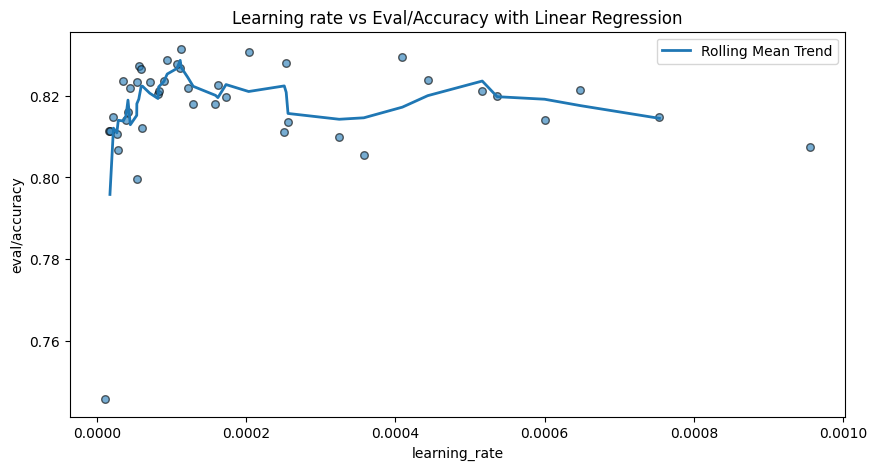

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assume df is already loaded with columns "dropout_top" and "eval/accuracy"
x = data_filtered["learning_rate"].values
y = data_filtered["eval/accuracy"].values

# Fit linear regression
X = x.reshape(-1, 1)
model = LinearRegression().fit(X, y)
coef = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

# Prepare data for plotting
order = np.argsort(x)
x_sorted = x[order]
y_pred_sorted = model.predict(x_sorted.reshape(-1, 1))

# Compute rolling mean for trend line
window = max(8, len(x) // 20)
y_smooth = pd.Series(y[order]).rolling(window= 4, min_periods=4, center=True).mean()

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x, y, alpha=0.6, edgecolors='k', s=30)
ax.plot(x_sorted, y_smooth, lw=2, label='Rolling Mean Trend')
#ax.plot(x_sorted, y_pred_sorted, lw=2, label='Linear Regression Fit')

ax.set_xlabel("learning_rate")
ax.set_ylabel("eval/accuracy")
ax.set_title("Learning rate vs Eval/Accuracy with Linear Regression")
ax.legend()

plt.show()

In [28]:
data_filtered.columns.values

array(['Name', 'State', 'Group', 'seed', 'eval/inversion_accuracy',
       'train/learning_rate', 'eval/key_pc_mode_accuracy',
       'eval/quality_accuracy',
       'eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy',
       'freeze_layers', 'batch_size', 'train/global_step',
       'learning_rate', 'quality.num_linear_layers',
       'primary_alteration_primary_degree_secondary_alteration_secondary_degree.num_linear_layers',
       'key_pc_mode.num_linear_layers', 'inversion.num_linear_layers',
       'Notes', 'eval/accuracy',
       'hyperparams.inversion.linear_layers_dim',
       'hyperparams.key_pc_mode.activation_fn',
       'hyperparams.inversion.activation_fn',
       'hyperparams.inversion.normalisation',
       'hyperparams.inversion.pooler_dropout',
       'hyperparams.freeze_layers'], dtype=object)

/tmp/ui556004/login23-1_3311149/ipykernel_3698814/744711177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['inversion.num_linear_layers'] = data_filtered['inversion.num_linear_layers'].astype(str)  # or use Categorical if you want specific order
/tmp/ui556004/login23-1_3311149/ipykernel_3698814/744711177.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Frozen Layers")


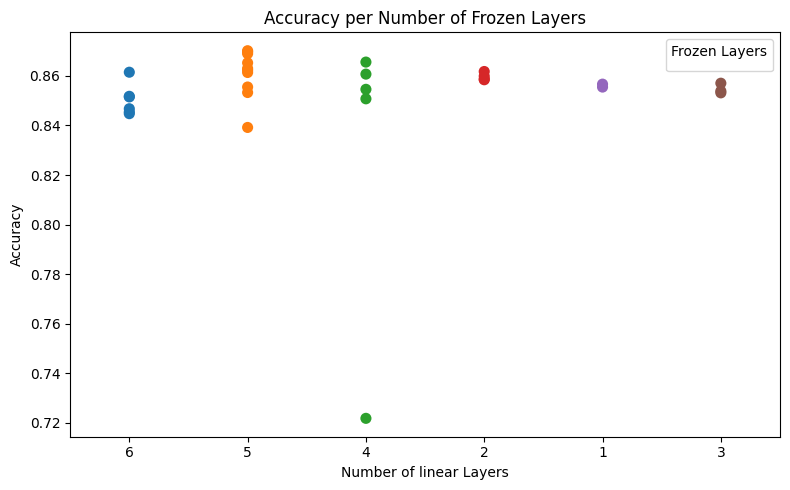

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure freeze_layers is treated as categorical
data_filtered['inversion.num_linear_layers'] = data_filtered['inversion.num_linear_layers'].astype(str)  # or use Categorical if you want specific order

# Create the plot
plt.figure(figsize=(8, 5))
sns.stripplot(data=data_filtered, x='inversion.num_linear_layers', y='eval/inversion_accuracy', hue='inversion.num_linear_layers', jitter=False, size=8, palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Number of linear Layers")
plt.ylabel("Accuracy")
plt.title("Accuracy per Number of Frozen Layers")
plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.show()

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
def display_four(data_filtered, parameter, targets= None, mode = False, box = False):

    df = data_filtered.copy()

    def pick_col(frame, candidates):
        for c in candidates:
            if c in frame.columns:
                return c
        raise KeyError(f"None of {candidates} found in DataFrame columns.")
    
    suffix = ".mode" if mode else ""
    # Define targets with possible column-name variants
    targets = [
        ("Inversion",
        [f"inversion.{parameter}{suffix}"],
        ["eval/inversion_accuracy"]),
        ("Quality",
        [f"quality.{parameter}{suffix}"],
        ["eval/quality_accuracy"]),
        ("Degree",
        [f"primary_alteration_primary_degree_secondary_alteration_secondary_degree.{parameter}{suffix}"],
        ["eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy"]),
        ("Key",
        [f"key_pc_mode.{parameter}{suffix}"],
        ["eval/key_pc_mode_accuracy"]),
    ]
    fig, axes = plt.subplots(2, 2, figsize=(11, 10), sharey=True)
    axes = axes.ravel()

    for ax, (name, layer_cands, acc_cands) in zip(axes, targets):
        layer_col = pick_col(df, layer_cands)
        acc_col   = pick_col(df, acc_cands)
        #ax.set_ylim(0.7, 0.9)

        # Make layer categorical (ordered by the numeric value)
        # Fall back to lexicographic if casting fails
        try:
            order = sorted(df[layer_col].dropna().astype(int).astype(str).unique(), key=lambda s: int(s))
        except Exception:
            order = sorted(df[layer_col].dropna().astype(str).unique())

        plot_df = df.copy()
        plot_df[layer_col] = plot_df[layer_col].astype(str)

        # Jittered points + per-layer mean trend
        if box:
            sns.boxplot(data=plot_df, x=layer_col, y=acc_col, dodge=False, ax = ax)
        else:
            sns.stripplot(
                data=plot_df, x=layer_col, y=acc_col,
                order=order, jitter=True, size=5, ax=ax
            )

        # Overlay means per number of layers
            means = (plot_df.groupby(layer_col, observed=True)[acc_col]
                            .mean()
                            .reindex(order))
            ax.plot(order, means.values, marker='o')

        ax.set_xlabel(f"{parameter}")
        ax.set_ylabel("Accuracy")
        ax.set_title(f"{name} — accuracy vs. layers")
        ax.grid(True, axis='y', linestyle='--', alpha=0.4)

    fig.suptitle(f"Accuracy per {parameter} (by target)", y=0.98)
    plt.tight_layout()
    plt.show()
    return targets

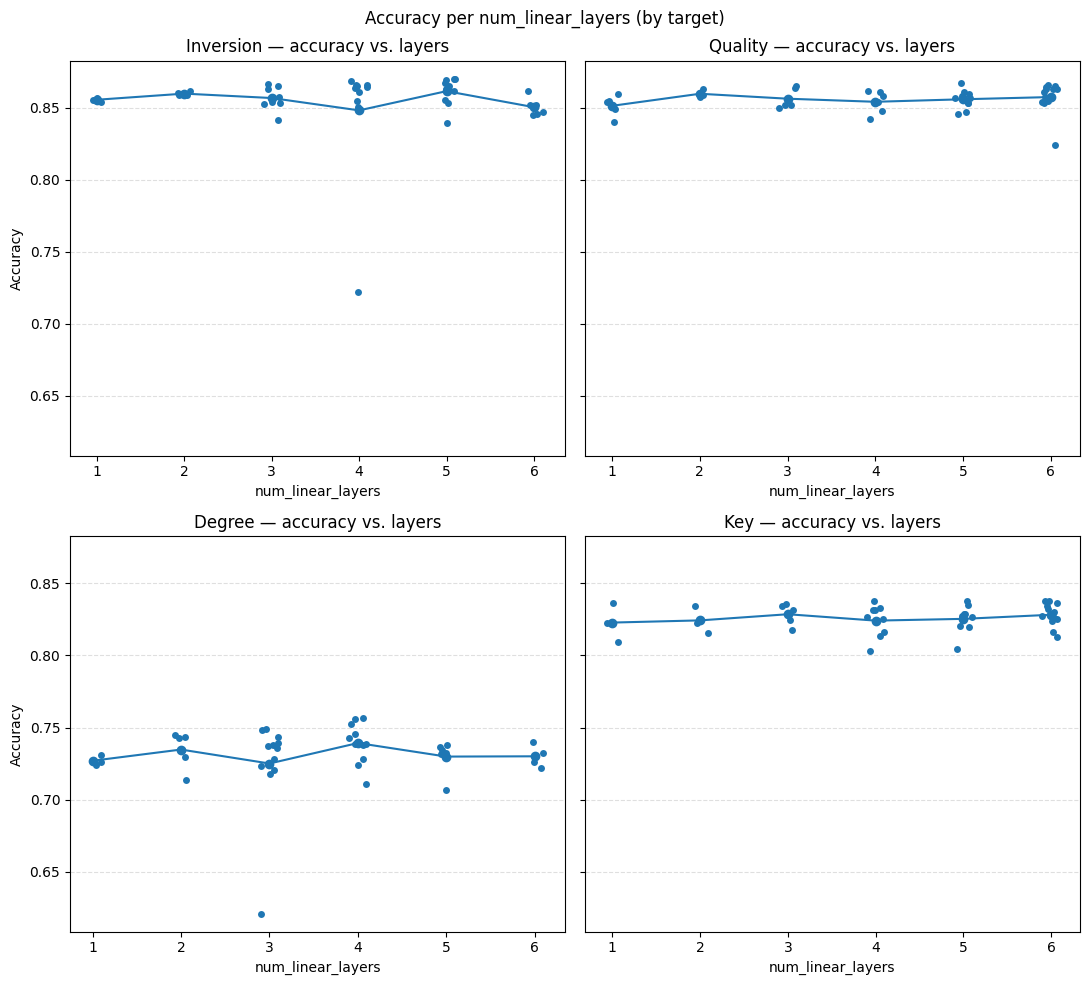

In [18]:
targets =display_four(data_filtered, parameter= "num_linear_layers")

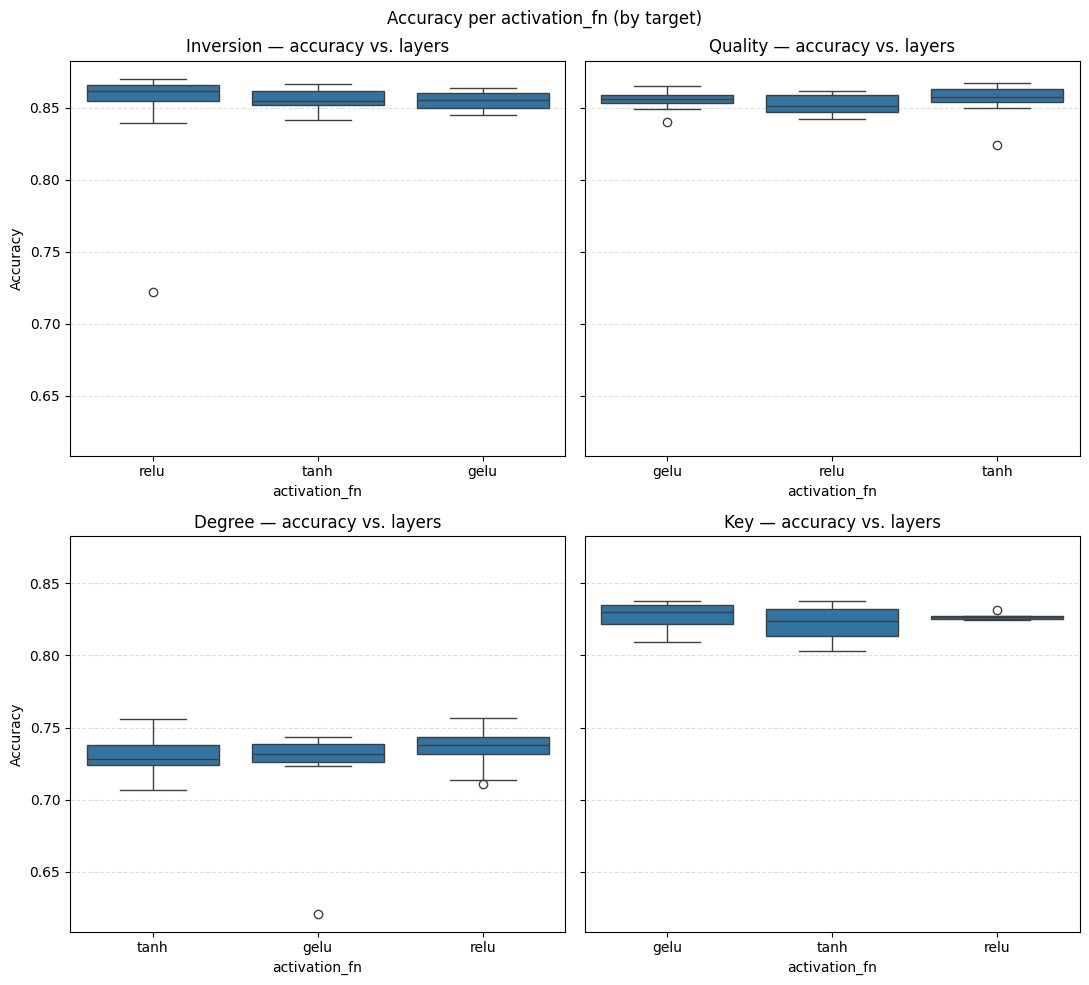

In [22]:
targets =display_four(data_filtered_copy, parameter= "activation_fn", mode = True, box = True)

In [20]:
import statistics 
def get_mode(parameter, target, data):
    statistics.mode(data_filtered[f"{target}.{parameter}"][0])
    data[f"{target}.{parameter}.mode"] =  data_filtered[f"{target}.{parameter}"].apply(lambda x : statistics.mode(x))
    return data

In [46]:
def create_df_unique_activation (df, target):
    mask = df[f"{target}.activation_fn"].apply(
        lambda v: len(set(v)) == 1
    )
    df_target = df.loc[mask, [f"{target}.activation_fn", f"eval/{target}_accuracy"]]
    df_target[f"{target}.activation_fn_unique"] = df_target [f"{target}.activation_fn"].apply(
        lambda v: v[0]
    )
    return df_target

In [55]:
df_activation_array

[           inversion.activation_fn  eval/inversion_accuracy  \
 2                           [tanh]                 0.854162   
 5         [gelu, gelu, gelu, gelu]                 0.863420   
 6               [tanh, tanh, tanh]                 0.863029   
 7         [relu, relu, relu, relu]                 0.866007   
 8   [relu, relu, relu, relu, relu]                 0.866789   
 9         [relu, relu, relu, relu]                 0.868174   
 10        [relu, relu, relu, relu]                 0.864351   
 15  [relu, relu, relu, relu, relu]                 0.839208   
 17  [relu, relu, relu, relu, relu]                 0.869713   
 18  [relu, relu, relu, relu, relu]                 0.870157   
 19  [relu, relu, relu, relu, relu]                 0.862284   
 20  [relu, relu, relu, relu, relu]                 0.868972   
 22  [relu, relu, relu, relu, relu]                 0.863004   
 25  [relu, relu, relu, relu, relu]                 0.865272   
 28                    [relu, relu]     

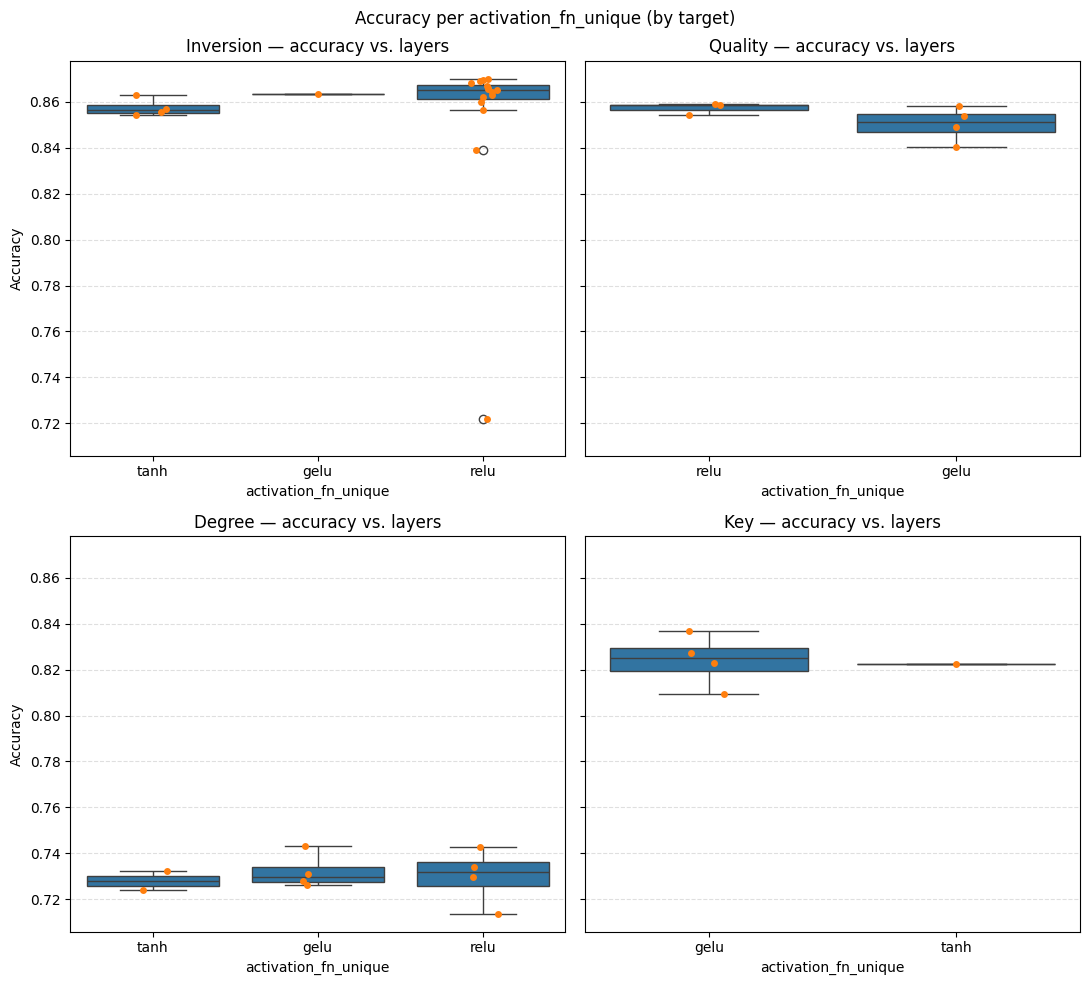

In [64]:
df_activation_array = []
targets = ["inversion", "quality", "primary_alteration_primary_degree_secondary_alteration_secondary_degree" , "key_pc_mode" ]
for target in targets:
    df_target = create_df_unique_activation (data_filtered,target)
    df_activation_array.append(df_target)
parameter = "activation_fn_unique"
suffix = ""
box = True
def pick_col(frame, candidates):
        for c in candidates:
            if c in frame.columns:
                return c
        raise KeyError(f"None of {candidates} found in DataFrame columns.")
targets = [
        ("Inversion",
        [f"inversion.{parameter}{suffix}"],
        ["eval/inversion_accuracy"]),
        ("Quality",
        [f"quality.{parameter}{suffix}"],
        ["eval/quality_accuracy"]),
        ("Degree",
        [f"primary_alteration_primary_degree_secondary_alteration_secondary_degree.{parameter}{suffix}"],
        ["eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy"]),
        ("Key",
        [f"key_pc_mode.{parameter}{suffix}"],
        ["eval/key_pc_mode_accuracy"]),
    ]
fig, axes = plt.subplots(2, 2, figsize=(11, 10), sharey=True)
axes = axes.ravel()
i = 0
for ax, (name, layer_cands, acc_cands) in zip(axes, targets):
    layer_col = pick_col(df_activation_array[i], layer_cands)
    acc_col   = pick_col(df_activation_array[i], acc_cands)

    plot_df = df_activation_array[i].copy()
    plot_df[layer_col] = plot_df[layer_col].astype(str)

    # Jittered points + per-layer mean trend
    if box:
        sns.boxplot(data=plot_df, x=layer_col, y=acc_col, dodge=False, ax = ax)
        sns.stripplot(
            data=plot_df, x=layer_col, y=acc_col,
             jitter=True, size=5, ax=ax
        )
    else:
        sns.stripplot(
            data=plot_df, x=layer_col, y=acc_col,
             jitter=True, size=5, ax=ax
        )

    ax.set_xlabel(f"{parameter}")
    ax.set_ylabel("Accuracy")
    ax.set_title(f"{name} — accuracy vs. layers")
    ax.grid(True, axis='y', linestyle='--', alpha=0.4)
    i += 1

fig.suptitle(f"Accuracy per {parameter} (by target)", y=0.98)
plt.tight_layout()
plt.show()

/tmp/ui556004/login23-1_1247272/ipykernel_360689/1930730713.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Frozen Layers")


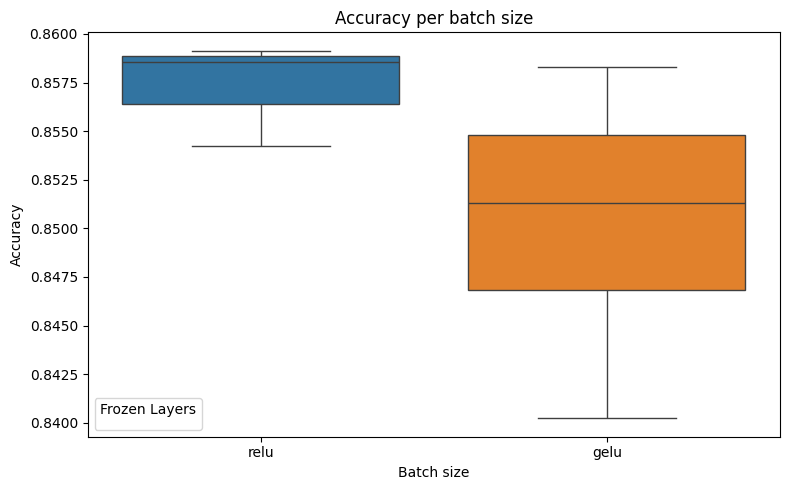

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
x = "activation_fn_unique"
y = "eval/quality_accuracy"
# Ensure freeze_layers is treated as categorical
#df_target[x] = df_target[x].astype(str)  # or use Categorical if you want specific order

# Create the plot
plt.figure(figsize=(8, 5))
#sns.stripplot(data=data_filtered, x='batch_size', y='eval/accuracy', hue='batch_size', jitter=False, size=8, palette='tab10', dodge=False)
sns.boxplot(data=df_target,x=x, y=y, hue=x, palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Batch size")
plt.ylabel("Accuracy")
plt.title("Accuracy per batch size")
plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.show()

In [21]:
targets = ["inversion", "quality", "key_pc_mode","primary_alteration_primary_degree_secondary_alteration_secondary_degree" ]
parameter = "activation_fn"
data_filtered_copy = data_filtered.copy()
for target in targets:
    data_filtered_copy=  get_mode(parameter, target, data_filtered_copy)
data_filtered_copy.head()

,Name,State,Group,seed,eval/inversion_accuracy,train/learning_rate,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,freeze_layers,...,hyperparams.inversion.pooler_dropout,hyperparams.freeze_layers,test/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,test/quality_accuracy,test/key_pc_mode_accuracy,test/inversion_accuracy,inversion.activation_fn.mode,quality.activation_fn.mode,key_pc_mode.activation_fn.mode,primary_alteration_primary_degree_secondary_alteration_secondary_degree.activation_fn.mode
0,trial_44,finished,attemtping_nas_1,42,0.865300,6.849192e-05,0.836752,0.864800,0.755756,7,...,"[0.19544505144816648,0.26133404278764066,0.091...",7,NaN,NaN,NaN,NaN,relu,gelu,gelu,tanh
1,trial_43,finished,attemtping_nas_1,42,0.841733,9.686664e-06,0.823776,0.854000,0.725928,6,...,"[0.30122170059628384,0.16593749714916284,0.142...",6,NaN,NaN,NaN,NaN,tanh,gelu,tanh,gelu
2,trial_42,finished,attemtping_nas_1,42,0.854162,5.810316e-04,0.812904,0.853325,0.736189,7,...,[0.361807250255753],7,NaN,NaN,NaN,NaN,tanh,gelu,tanh,gelu
3,trial_41,finished,attemtping_nas_1,42,0.865199,1.121298e-04,0.832602,0.859161,0.738678,7,...,"[0.2325902441826025,0.010138123439974334,0.200...",7,NaN,NaN,NaN,NaN,tanh,gelu,tanh,gelu
4,trial_40,finished,attemtping_nas_1,42,0.866415,1.895691e-07,0.837870,0.860987,0.752601,7,...,"[0.22320394798737436,0.0006996362698388214,0.0...",7,NaN,NaN,NaN,NaN,tanh,gelu,tanh,relu


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure freeze_layers is treated as categorical
data_filtered['inversion.activatin_fn'] = data_filtered['inversion.num_linear_layers'].astype(str)  # or use Categorical if you want specific order

# Create the plot
plt.figure(figsize=(8, 5))
sns.stripplot(data=data_filtered, x='inversion.num_linear_layers', y='eval/inversion_accuracy', hue='inversion.num_linear_layers', jitter=False, size=8, palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Number of linear Layers")
plt.ylabel("Accuracy")
plt.title("Accuracy per Number of Frozen Layers")
plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.show()

/tmp/ui556004/login23-1_3311149/ipykernel_3698814/3230526467.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered["inverision.activation_fn.mode"] =  data_filtered['hyperparams.inversion.activation_fn'].apply(lambda x : statistics.mode(x))
/tmp/ui556004/login23-1_3311149/ipykernel_3698814/3230526467.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Frozen Layers")


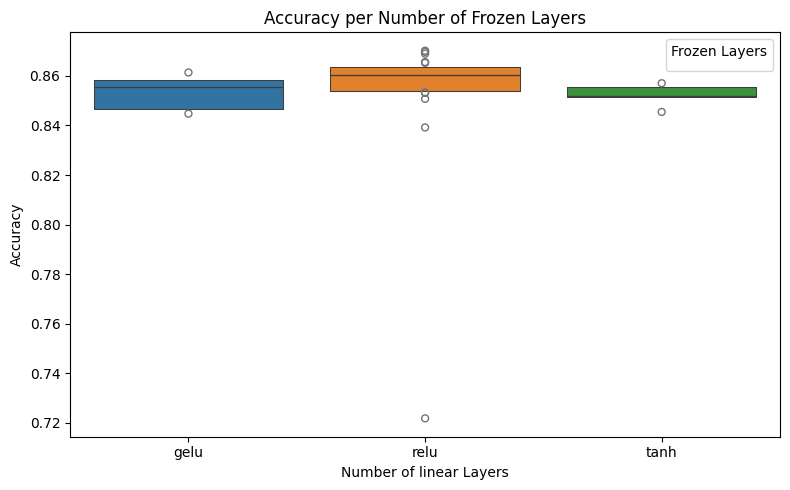

In [18]:
import statistics 
import seaborn as sns
import matplotlib.pyplot as plt
statistics.mode(data_filtered['hyperparams.inversion.activation_fn'][0])
data_filtered["inverision.activation_fn.mode"] =  data_filtered['hyperparams.inversion.activation_fn'].apply(lambda x : statistics.mode(x))


# Ensure freeze_layers is treated as categorica

# Create the plot
plt.figure(figsize=(8, 5))
sns.boxenplot(data=data_filtered, x="inverision.activation_fn.mode", y='eval/inversion_accuracy', hue="inverision.activation_fn.mode",  palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Number of linear Layers")
plt.ylabel("Accuracy")
plt.title("Accuracy per Number of Frozen Layers")
plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.show()